<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap10/10_4_Downsampling_and_Upsampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 10.4: Downsampling and Upsampling**

This notebook investigates the down sampling and downsampling methods discussed in section 10.4 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

In [41]:
# Define 4 by 4 original patch
orig_4_4 = np.array([[1, 3, 5,3 ], [6,2,0,8], [4,6,1,4], [2,8,0,3]])
print(orig_4_4)

[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]


In [42]:
def subsample(x_in):
  x_out = np.zeros(( int(np.ceil(x_in.shape[0]/2)), int(np.ceil(x_in.shape[1]/2)) ))
  x_out = x_in[::2, ::2]  # every other value along row and col, slicing is perfect for the job (start:stop:step)
  return x_out

In [43]:
print("Original:")
print(orig_4_4)
print("Subsampled:")
print(subsample(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Subsampled:
[[1 5]
 [4 1]]


Let's try that on an image to get a feel for how it works:

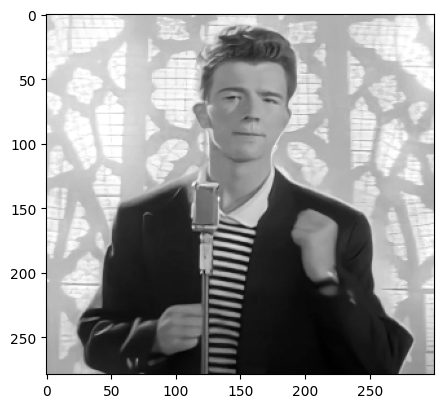

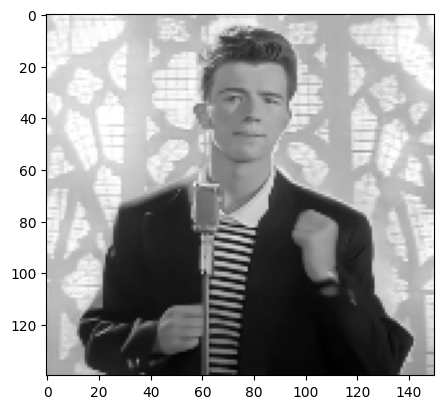

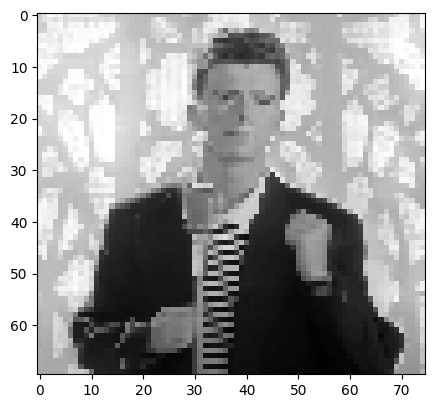

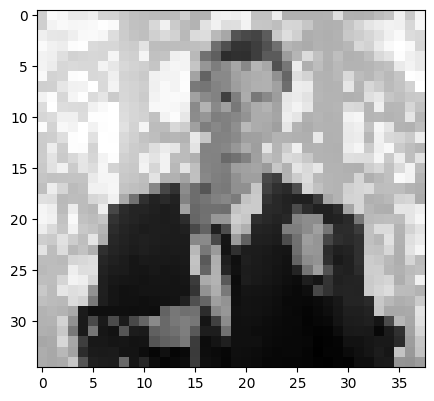

(279, 300)


In [44]:
# load the image
image = Image.open('test_image.png')
# convert image to numpy array
data = asarray(image)
data_subsample = subsample(data)

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_subsample, cmap='gray')
plt.show()

data_subsample2 = subsample(data_subsample)
plt.figure(figsize=(5,5))
plt.imshow(data_subsample2, cmap='gray')
plt.show()

data_subsample3 = subsample(data_subsample2)
plt.figure(figsize=(5,5))
plt.imshow(data_subsample3, cmap='gray')
plt.show()
print(data.shape)

In [45]:
# Now let's try max-pooling
def maxpool(x_in, pool_size, stride):
  x_out = np.zeros((int(np.floor(x_in.shape[0]/pool_size)), int(np.floor(x_in.shape[1]/pool_size))))
  # the latter one is a general way of computing final output size after a pooling operation
  assert x_out.shape[0] == np.floor((x_in.shape[0] - pool_size) / stride + 1) and x_out.shape[1] == np.floor((x_in.shape[1] - pool_size) / stride + 1)
  x_out = np.array([[np.max(x_in[r * stride: r * stride + pool_size, c * stride: c * stride + pool_size]) for c in range(len(x_out[r]))] for r in range(len(x_out))])
  return x_out

In [46]:
print("Original:")
print(orig_4_4)
print("Maxpooled:")
print(maxpool(orig_4_4, 2, 2))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Maxpooled:
[[6 8]
 [8 4]]


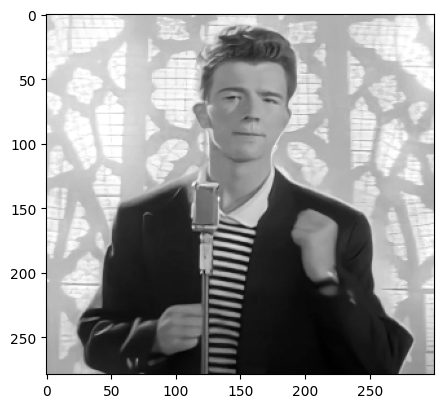

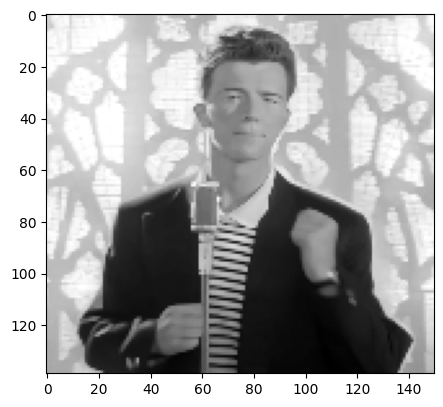

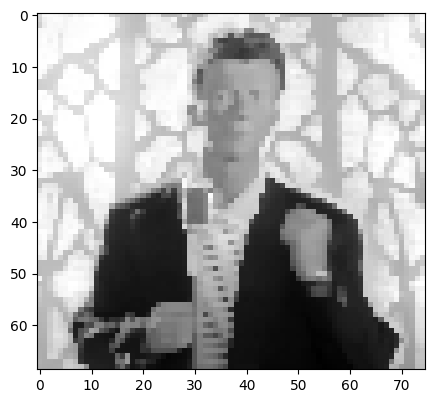

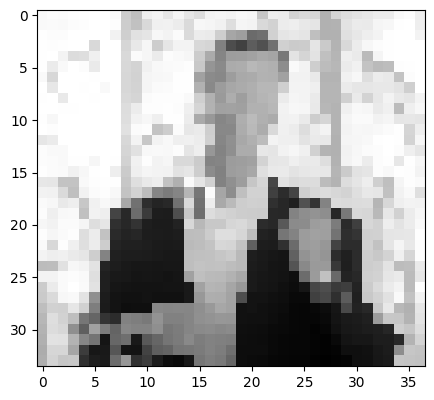

In [47]:
# Let's see what Rick looks like:
pool_size = 2
stride = 2
data_maxpool = maxpool(data, pool_size, stride)

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_maxpool, cmap='gray')
plt.show()

data_maxpool2 = maxpool(data_maxpool, pool_size, stride)
plt.figure(figsize=(5,5))
plt.imshow(data_maxpool2, cmap='gray')
plt.show()

data_maxpool3 = maxpool(data_maxpool2, pool_size, stride)
plt.figure(figsize=(5,5))
plt.imshow(data_maxpool3, cmap='gray')
plt.show()

You can see that the stripes on his shirt gradually turn to white because we keep retaining the brightest local pixels.

In [48]:
# Finally, let's try mean pooling
def meanpool(x_in, pool_size, stride):
  x_out = np.zeros(( int(np.floor(x_in.shape[0]/2)), int(np.floor(x_in.shape[1]/2)) ))
  assert x_out.shape[0] == np.floor((x_in.shape[0] - pool_size) / stride + 1) and x_out.shape[1] == np.floor((x_in.shape[1] - pool_size) / stride + 1)
  x_out = np.array([[np.mean(x_in[r * stride: r * stride + pool_size, c * stride: c * stride + pool_size]) for c in range(len(x_out[r]))] for r in range(len(x_out))])
  return x_out

In [49]:
print("Original:")
print(orig_4_4)
print("Meanpooled:")
print(meanpool(orig_4_4, 2, 2))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Meanpooled:
[[3. 4.]
 [5. 2.]]


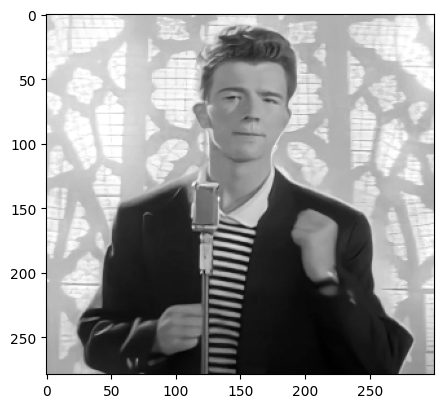

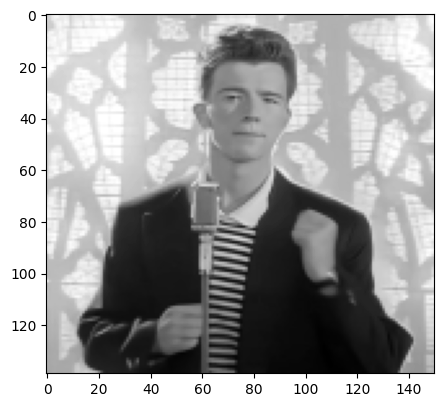

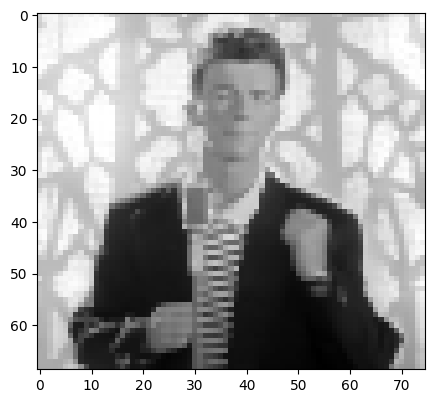

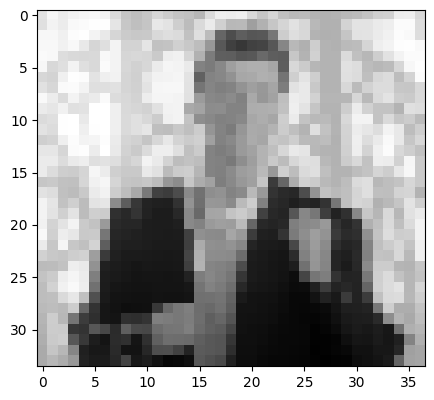

In [50]:
# Let's see what Rick looks like:
pool_size = 2
stride = 2
data_meanpool = meanpool(data, pool_size, stride)

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_meanpool, cmap='gray')
plt.show()

data_meanpool2 = meanpool(data_maxpool, pool_size, stride)
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool2, cmap='gray')
plt.show()

data_meanpool3 = meanpool(data_meanpool2, pool_size, stride)
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool3, cmap='gray')
plt.show()

Notice that the three low resolution images look quite different. <br>

Now let's upscale them again

In [51]:
# Define 2 by 2 original patch
orig_2_2 = np.array([[2, 4], [4,8]])
print(orig_2_2)

[[2 4]
 [4 8]]


In [52]:
# Let's first use the duplication method
def duplicate(x_in, upsample_factor):
    x_out = np.zeros(( x_in.shape[0]*upsample_factor, x_in.shape[1]*upsample_factor ))
    i = 0
    for r in range(0, len(x_out), upsample_factor):
      j = 0
      for c in range(0, len(x_out[r]), upsample_factor):
        x_out[r: r + upsample_factor, c: c + upsample_factor] = x_in[i, j]
        j += 1
      i += 1
    return x_out

In [53]:
print("Original:")
print(orig_2_2)
print("Duplicated:")
print(duplicate(orig_2_2, 2))

Original:
[[2 4]
 [4 8]]
Duplicated:
[[2. 2. 4. 4.]
 [2. 2. 4. 4.]
 [4. 4. 8. 8.]
 [4. 4. 8. 8.]]


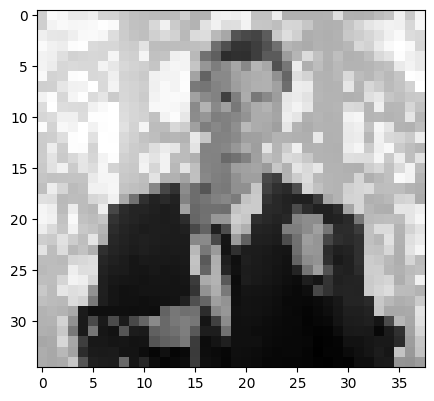

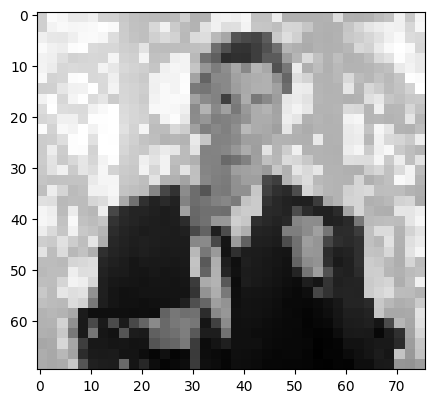

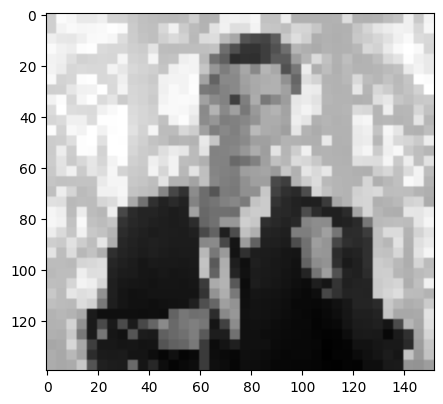

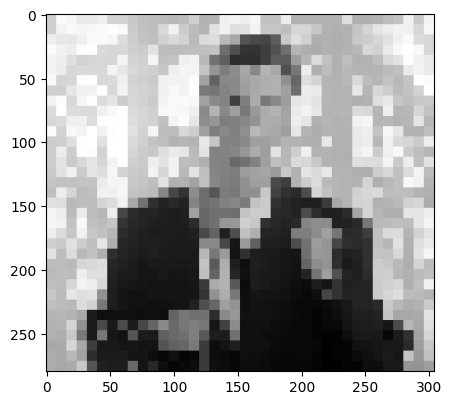

In [54]:
# Let's re-upsample, sub-sampled rick
upsample_factor = 2
data_duplicate = duplicate(data_subsample3, upsample_factor)

plt.figure(figsize=(5,5))
plt.imshow(data_subsample3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_duplicate, cmap='gray')
plt.show()

data_duplicate2 = duplicate(data_duplicate, upsample_factor)
plt.figure(figsize=(5,5))
plt.imshow(data_duplicate2, cmap='gray')
plt.show()

data_duplicate3 = duplicate(data_duplicate2, upsample_factor)
plt.figure(figsize=(5,5))
plt.imshow(data_duplicate3, cmap='gray')
plt.show()

They look the same, but if you look at the axes, you'll see that the pixels are just duplicated.

In [55]:
# Now let's try max pooling back up
# The input x_high_res is the original high res image, from which you can deduce the position of the maximum index
# Adding clarification here: the values you want to upsample DO NOT have to be the max values in the blocks in the original
# matrix, you only need to make sure that the current values are assigned to the LOCATIONS of where the maximum values were in 
# the original matrix, that's all
def max_unpool(x_in, x_high_res, upsample_factor):
  x_out = np.zeros(( x_in.shape[0]*upsample_factor, x_in.shape[1]*upsample_factor ))
  i=0
  for r in range(0, len(x_out), upsample_factor):
    j = 0
    for c in range(0, len(x_out[r]), upsample_factor):
      block = x_high_res[r: r + upsample_factor, c: c + upsample_factor]
      row, col = np.where(block == block.max())
      x_out[row[0] + r, col[0] + c] = x_in[i, j]
      j += 1
    i += 1
  return x_out

In [56]:
print("Original:")
print(orig_2_2)
print("High res original")
print(orig_4_4)
print("Max unpooled:")
print(max_unpool(orig_2_2,orig_4_4, 2))

Original:
[[2 4]
 [4 8]]
High res original
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Max unpooled:
[[0. 0. 0. 0.]
 [2. 0. 0. 4.]
 [0. 0. 0. 8.]
 [0. 4. 0. 0.]]


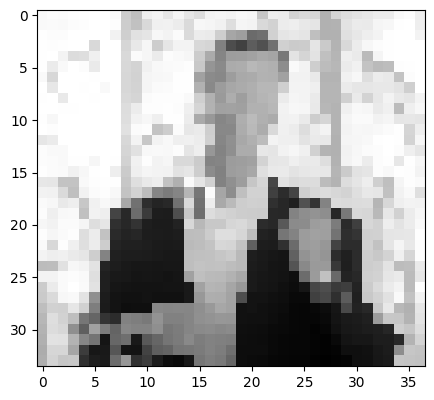

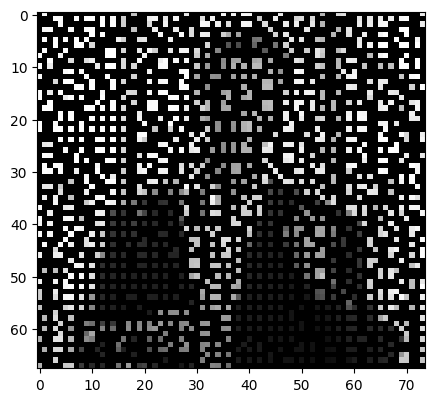

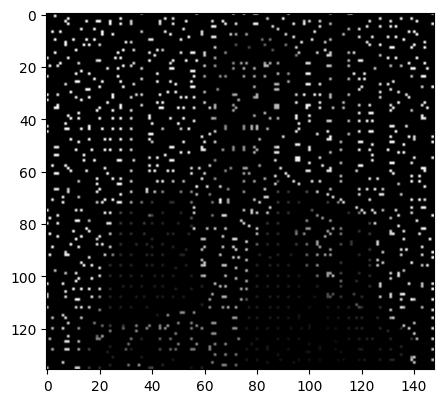

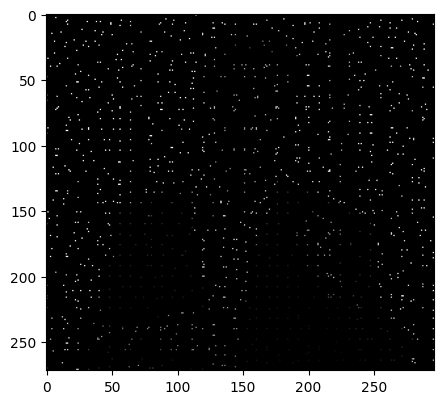

In [57]:
# Let's re-upsample, sub-sampled rick
upsample_factor = 2
data_max_unpool= max_unpool(data_maxpool3,data_maxpool2, upsample_factor)

plt.figure(figsize=(5,5))
plt.imshow(data_maxpool3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool, cmap='gray')
plt.show()

data_max_unpool2 = max_unpool(data_max_unpool, data_maxpool, upsample_factor)
plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool2, cmap='gray')
plt.show()

data_max_unpool3 = max_unpool(data_max_unpool2, data, upsample_factor)
plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool3, cmap='gray')
plt.show()

Finally, we'll try upsampling using bilinear interpolation.  We'll treat the positions off the image as zeros by padding the original image and round fractional values upwards using np.ceil()

<div style="color:green;white-space:pre-wrap">This one was brutal, took me 3 hours to get it right. The first thing anyone notices about the interpolated values is that they are just averages of two values and that you have to put the interpolated value in between the two values used to calculate it. However, when implementing it, you will notice quickly that you need to also interpolate the interpolated values at the new rows that contains them. Doing this in a certain order can mess things up, so it's about finding an order that works. Also, because you are jumping and having a constraint on where to put the interpolated values figuring out the correct indices is tricky, so it's easy to introduce unintended bugs. 

My approach was to split the interpolations up into col and row, by doing the col interpolations first and then the row. One could do the col and row at the same time, which I did at first, but then the very last column would not the interpolated and would require an extra loop at the end to remedy. I thought that looked janky codewise (not that my current solution isn't jacky enough already), so I split it up in col and row interpolations instead. This worked because I noticed that the col interpolation wasn't dependent on the row interpolation, but the row interpolation was, at least because of the way I did it. Also the fact that every interpolated value has to be at odd positions enforces annoying indexing into the code. And because of offsets due to 2 values were always needed to interpolate so need to grab the other value as well and how the last row/col needed to be handled differently (mean of current position and the adjacent neighbor), this introduced ugly indexing all together. Should also mentio that I fill two rows at the same time when doing the col interpolation, this is just because of how the row interpolation needs the interpolated col values before it does its interpolation.

Nevertheless, this is I think the naive way of solving it, perhaps with more efficient indexing in can be shortened, but it's pretty much something like this. I think however that proper bilinear interpolation uses some fancy math formulas to make it much more readable and shorter.
</div>

In [58]:
def bilinear(x_in):
  x_out = np.zeros(( x_in.shape[0]*2, x_in.shape[1]*2 ))
  x_in_pad = np.zeros((x_in.shape[0]+1, x_in.shape[1]+1))
  x_in_pad[0:x_in.shape[0],0:x_in.shape[1]] = x_in
  # fill the upsampled matrix w with the original values, because we are iterating through the upsampled matrix
  # we don't want to access values outside the original matrix, I think this approach makes it easier for me to code the interpolation
  # we skip accessing the edges of x_in_pad because the x_out already has zeros on its edges
  for r in range(len(x_in_pad) - 1):
    for c in range(len(x_in_pad[r]) - 1):
      x_out[2*r, 2*c] = x_in_pad[r, c]

  # even positions on col and row contains the original values that we use to interpolate, these should not be replaced
  # column interpolation
  # jumping 2 steps only works if the size is even, otherwise might end up at the end of row, but it is always even luckily (because of shape*2)
  for r in range(0, len(x_out) - 1, 2):
    for c in range(len(x_out[r]) - 1):
      if r + 1 != len(x_out) - 1:  # this check is to avoid interpolating at the last row, because of how I've coded it row interpolation will take care of that last row automatically
        if c + 1 == len(x_out[r]) - 1:
          # we are at the end so interpolate on the col edge only
          x_out[r, c + 1] = np.ceil(np.mean(x_out[r, c: c + 1 + 1]))  # when doing slice c : c + 2, start:end, the end is excluded, so need to add with 1 extra to include it
          x_out[r + 2, c + 1] = np.ceil(np.mean(x_out[r + 2, c: c + 1 + 1]))
        elif (c + 1) % 2 == 1:
          # only fill the interpolated values at odd col positions
          x_out[r, c + 1] = np.ceil(np.mean(x_out[r, [c, c + 2]]))
          x_out[r + 2, c + 1] = np.ceil(np.mean(x_out[r + 2, [c, c + 2]]))

  # row interpolation
  for r in range(0, len(x_out) - 1, 2):
    for c in range(len(x_out[r])):
      if r + 1 == len(x_out) - 1:
        # interpolate on the row edge only
        x_out[r + 1, c] = np.ceil(np.mean(x_out[r:r + 1 + 1, c]))
      elif (r + 1) % 2 == 1:
        # only fill the interpolated values at odd row positions
        x_out[r + 1, c] = np.ceil(np.mean(x_out[[r, r + 2], c]))
              
  return x_out

In [59]:
print("Original:")
print(orig_2_2)
print("Bilinear:")
print(bilinear(orig_2_2))

Original:
[[2 4]
 [4 8]]
Bilinear:
[[2. 3. 4. 2.]
 [3. 5. 6. 3.]
 [4. 6. 8. 4.]
 [2. 3. 4. 2.]]


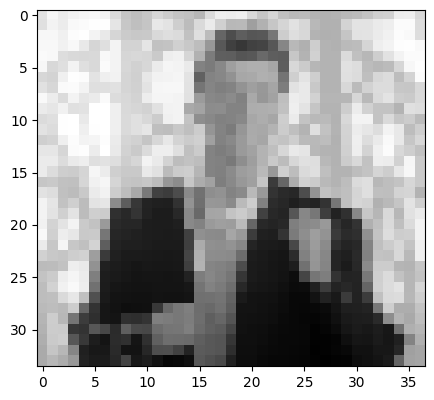

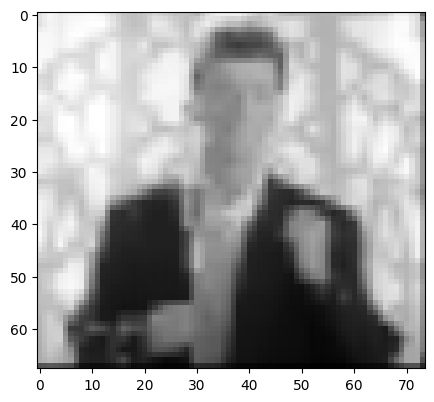

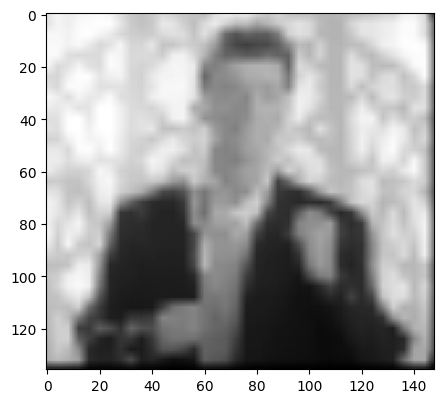

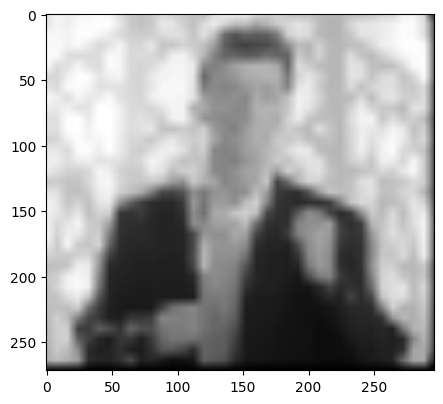

In [60]:
# Let's re-upsample, sub-sampled trick
data_bilinear = bilinear(data_meanpool3)

plt.figure(figsize=(5,5))
plt.imshow(data_meanpool3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_bilinear, cmap='gray')
plt.show()

data_bilinear2 = bilinear(data_bilinear)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear2, cmap='gray')
plt.show()

data_bilinear3 = bilinear(data_bilinear2)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear3, cmap='gray')
plt.show()